## Artificial Intelligence, Part II: Learning

Today we will continue the discussion on the learning part of the course. We will study how the linear model can be used to learn a mapping on data that was non linerly generated. We will illustrate regularization and classification.

For those who are taking the ML course in parallel you can jump directly to exercise 4 below. 

### 1. Linear regression on non linearly distributed data

Recall that the general linear regression model in the univariate case reads as

$$y(x) = \beta_0 + \beta_1 x$$


In previous sessions we saw how to code gradient descent an used it to learn a linear regression model on linear data.

Consider the dataset below which was generated by the function $f(x) = x^2 + x +1$. Although the function is non linear, linear regression can still be used to learn the distribution of the data. From the original set of examples $\left\{\mathbf{x}^{(i)}, t^{(i)}\right\}$ where $\mathbf{x}^{(i)}$ are the feature vectors and feedback the agent gets, one can consider instead of $\mathbf{x}^{(i)}$, the extended vector $(\mathbf{x}^{(i)}, (\mathbf{x}^{(i)})^2)$ and learn a _multivariate_ regression model of the form 

$$y(x) = \beta_0 + \beta_1x_1 + \beta_2 x_2$$

on the examples $(x^{(i)}, (x^{(i)})^2)$. That is we keep a linear model but now the model is defined on an extended set of attributes/features including higher powers of the original attributes.

We can do this because the model does not have to know that we hide non linearity in the new features. The agent sees the new features and learn a model on those features not knowing what is hidden in those features. 

Once we have learned the model $y(x) = \beta_0 + \beta_1 x + \beta_2 x^2$, we can recover the quandratic function by taking any new sample $x^*$, squaring $x^*$ and getting y as $\beta_0 + \beta_1 x^* + \beta_2 (x^*)^2$. 

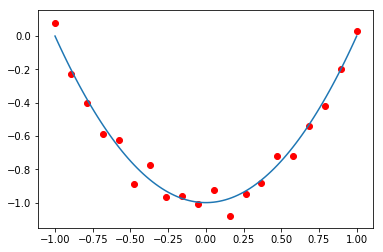

In [25]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)

xi = np.linspace(-1,1,20)
noise = np.random.normal(0,0.05,20)

ti = (xi-1)*(xi+1) 
tinoisy = ti+noise

plt.scatter(xi,tinoisy, c = 'r')
plt.plot(np.linspace(-1,1,100), (np.linspace(-1,1,100)-1)*(np.linspace(-1,1,100)+1) )
plt.show()



The linear regression model can be learned from scratch through gradient descent but it can also be learned via the scikit-learned library. The linear_regression model from scikit learn comes with the functions fit and predict. Fit is used to learn the weights of the model, predict is used to predict the value of the model at a new point. 

Once the model has been learned, it is possible to represent the corresponding plane in the space $(y, x_1, x_2)$. This shows that if it is not possible to learn a linear model in the original space, it is possible to lift the data in a higher dimensional space and learn a linear model in this space. 

Once the plane has been learned, we can use it to get the value at any new point $x^{(i)}$ by getting the pair $(x^{(i)},(x^{(i)})^2)$, obtain $y$ from the plane, and bring back this value back in the original space. 


In [ ]:
from sklearn.linear_model import LinearRegression

'''Using the function linear_regression from scikit learn, fit the linear model 
to the extedned feature vector. Then plot the result on top of the data''' 







### 2 Closed form

We will now use the matrix equations to solve for the weight vector. Stack all the feature/attribute vector as the rows of the matrix $X$ then solve for the weight vector using the expression $\mathbf{\beta}^*= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

In [ ]:
import numpy as np




### 3. Overfitting 

Consider the same dataset as above, scikit learn also provide a function 'PolynomialFeatures' which can be used to generate additional powers from a some original set of features. We will use this function to change the complexity of our model and plot the result. 

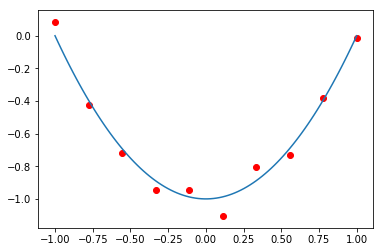

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import PolynomialFeatures


np.random.seed(1)

xi = np.linspace(-1,1,10)
noise = np.random.normal(0,0.05,10)

ti = (xi-1)*(xi+1) 
tinoisy = ti+noise

plt.scatter(xi,tinoisy, c = 'r')
plt.plot(np.linspace(-1,1,100), (np.linspace(-1,1,100)-1)*(np.linspace(-1,1,100)+1) )
plt.show()



### 4. Regularization.


On top of the LinearRegression model, scikit learn also provides models for the sum of squares and sum of absolute values penalties on the weights. Those two regularized models are respectively known as Ridge Regression and LASSO. We will use those models with multivariate linear model so see how they can reduce the amount of overfitting 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import linear_model




### 5. Classification.


The linear model can be used to learn classification boundaries as well. When considering $K$ classes, we can just define our attribute/feature vectors as $K$ dimensional vectors whose $k^{th}$ attribute/feature is $1$ if the point belongs to class $\mathcal{C}_k$ and $0$ otherwise. We can then minimize the sum of residual as in the regression case 

$$\min_{\mathbf{\beta }} \sum_{i=1}^N \left(y^{(i)} - (\beta_0 + \beta_1 x_1^{(i)} + \beta_2 x^{(i)}_2)\right)^2$$

For any plane, note that the equation of the plane $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$ gives the points that are lying on the plane. A point above the plane will return a positive value for $\beta_0 + \beta_1 x_1 + \beta_2 x_2$ and a point below will return a negative value for $\beta_0 + \beta_1 x_1 + \beta_2 x_2$. 

The minimization problem above will then find the plane that gives the larger values to the points with targets/labels $1$ and the smallest values (or even possible negative values) to the points with targets $0$.

In particular our plane (i.e. the points satisfying the equation $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$) should thus located in between the two classes. 


Using this idea we will learn a classifier for the dataset below. 

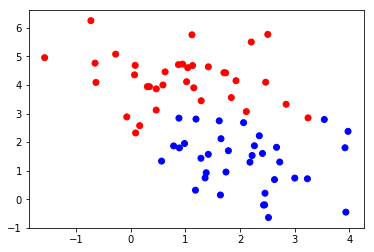

In [32]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

X, y = make_blobs(n_samples=70, centers=2, n_features=2, random_state=0)

plt.scatter(X[:,0], X[:,1], c = y, cmap = cm_bright)
plt.show()

### 5. Multiple labels 

The idea above can be extended to a multiclass classification problem by introducing a vector of targets. For a three classes problem like below, we can associate to each point a vector of size $3$ such that $t_k = 1$ if $x^{(i)}$ belongs to class $\mathcal{C}_k$ and $0$ otherwise. A training point in class $\mathcal{C}_1$ is thus given the target $(1,0,0)$. The LinearRegression model can be used with $d$ dimensional targets and we can thus use it to learn our multiclass classifier. 

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

X, y = make_blobs(n_samples=70, centers=3, n_features=2, random_state=0)

plt.scatter(X[:,0], X[:,1], c = y, cmap = cm_bright)
plt.show()





### 6. Hard threshold and Perceptron 

Instead of classifying our points by first learning a plane via a minimization of the $\ell_2$ loss and then discriminating between classes by looking at the value of the prediction, one could add a threshold function on top of the linear model, defining our hypothesis as 

$$h_{\mathbf{\beta}}(\mathbf{x}) = \text{f}(\mathbf{\beta }^T\mathbf{x})$$

where $f(a)$ is defined as $f(a) = +1$ if $a\geq 0$ and $-1$ otherwise. In such a framework, we can then define the error as 

$$E_P(\mathbf{\beta }) = -\sum_{i\in \mathcal{M}}(\tilde{\mathbf{\beta}}^T\mathbf{x}^{(i)})t^{(i)}$$

$\mathcal{M}$ representing the misclassified points. We can then apply stochastic gradient descent on this cost, getting iterates 

$$\mathbf{\beta}\leftarrow \mathbf{\beta} - \eta \nabla E_P(\mathbf{\beta}) = \mathbf{\beta}+\eta \mathbf{x}^{(i)}t^{(i)}$$

Implement those steps below.

In [ ]:
from scipy.io import loadmat
pointsClass1 = loadmat('Perceptron_Class1')['Perceptron_Class1']
pointsClass2 = loadmat('Perceptron_Class2')['Perceptron_Class2']



### 7.  Logistic regression 


#### 7.1. Scikit learn

Another problem with the simple LS classifier is that it can return large values for points that are located far from the decision boundary. With the points given below we will compare the output of the simple least squares classifier and the logistic regression model below.



In [ ]:
from scipy.io import loadmat
pointsClass1 = loadmat('Xclass1LR')['Xclass1LR']
pointsClass2 = loadmat('Xclass2LR')['Xclass2LR']


#### 7.2. From scratch

Using the data below, we can also get the separating plane through gradient descent. Implement this idea and plot the resulting boundary

In [ ]:
from scipy.io import loadmat
pointsClass1 = loadmat('Perceptron_Class1')['Perceptron_Class1']
pointsClass2 = loadmat('Perceptron_Class2')['Perceptron_Class2']


### 8. Complex data 


When no intuition is known on the data distribution, and/or the data is complex (such as images or sounds), an alternative to generating a lot of polynomial features and combining those features with a regularization is to learn the classification through a neural network. Scikit learn comes with a variety of datasets that can be used as benchmarks for classification problems. 

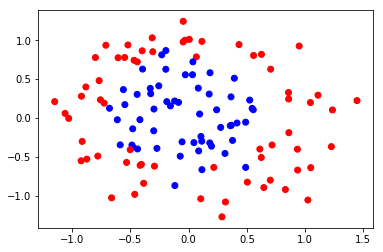

In [38]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

dataset =  make_circles(n_samples = 200, noise=0.2, factor=0.5, random_state=1)
X, y = dataset
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
        
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.show()

### 9. Prediction with neural networks

In this second demo, we will use the neural network module from scikit learn to detect heart disease. 
For this example, you need to [download the data from Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). You can then open the csv data file with pandas.

In [ ]:

from sklearn.neural_network import MLPClassifier as MLP
import numpy as np 
import pandas as pd 

#Plotting Functions
import matplotlib.pyplot as plt

heart=pd.read_csv('/your_directory/heart.csv')
heart.info()
heart.head()

### 10 Advanced image recognition with convolution neural networks

This section is __for those who are taking the ML and AI courses__. Follow the link below to load images of traffic 
signs from the German Traffic Sign Challenge. 

Click [here](https://drive.google.com/drive/folders/1j92tQaHejWEURL6a6jI03rK8dCsxmnFT?usp=sharing) to download the images. 

Start by displaying a couple of those images using plt.imshow. Then check the Keras documentation for the modules that are imported below and try to combine them to distinguish between 2 signs first. 

Once your model can discriminate between tow signs, you can try extend it to more signs.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_first')